In [3]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
from ipywidgets import interact

Populating the interactive namespace from numpy and matplotlib


# A simple stochastic gene expression model
$$
{\text{off} \atop (N=0)}
\quad
{{\alpha/\epsilon \atop\longrightarrow}\atop {\longleftarrow \atop  \beta/\epsilon}}
\quad
{\text{on} \atop (N=1)}\quad
$$
where $x$ and $y$ satisfy the ODEs
$$
\dot{x} = \gamma N(t) - \delta x
$$
The solution to the above linear ODE is
$$
x(t) = x_0 e^{-\delta(t - t_0)} + \frac{\gamma N(t)}{\delta}\left(1 -  e^{-\delta(t - t_0)}\right).
$$
Note that the derivative $\frac{d}{dt}N(t) = 0$ for every $t>0$ except where jumps occur. We will be 'integrating' the ode between jumps in the Markov process $N(t)$.

In the limit $\epsilon \to 0^+$, the stochastic process converges to the ODE
$$\dot{x}_{\infty} = \langle N \rangle \gamma - \delta x_{\infty}, \quad x_{\infty}(0) = x_0,$$
where
$$\langle N \rangle = \frac{\alpha}{\alpha + \beta}.$$
The exact solution is
$$
x_{\infty}(t) = x_0 e^{-\delta t} + \frac{\gamma \langle N \rangle}{\delta}\left(1 -  e^{-\delta t}\right).
$$

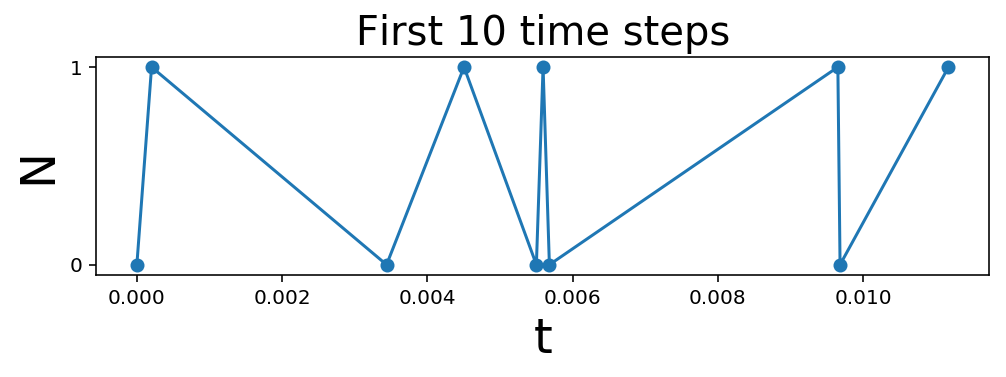

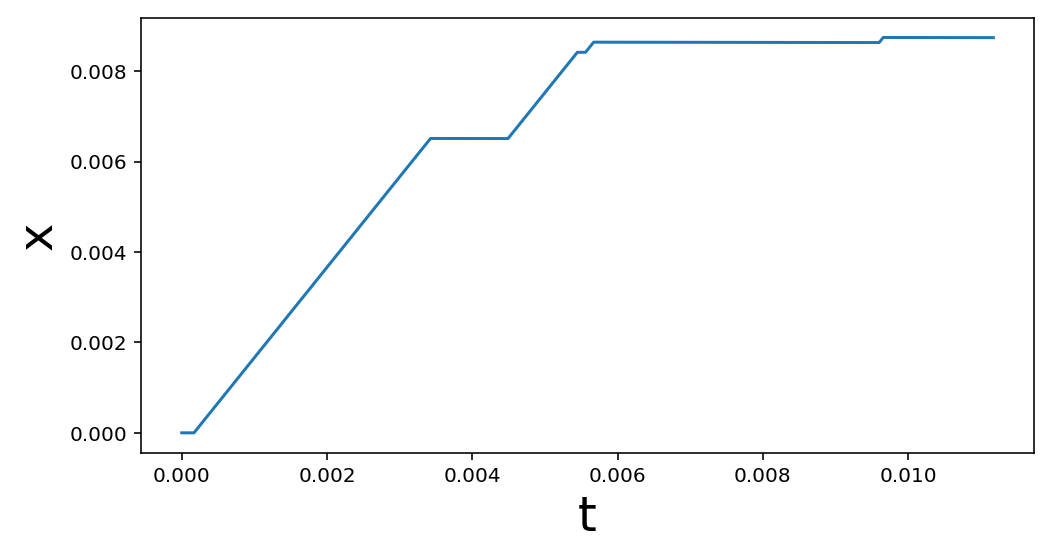

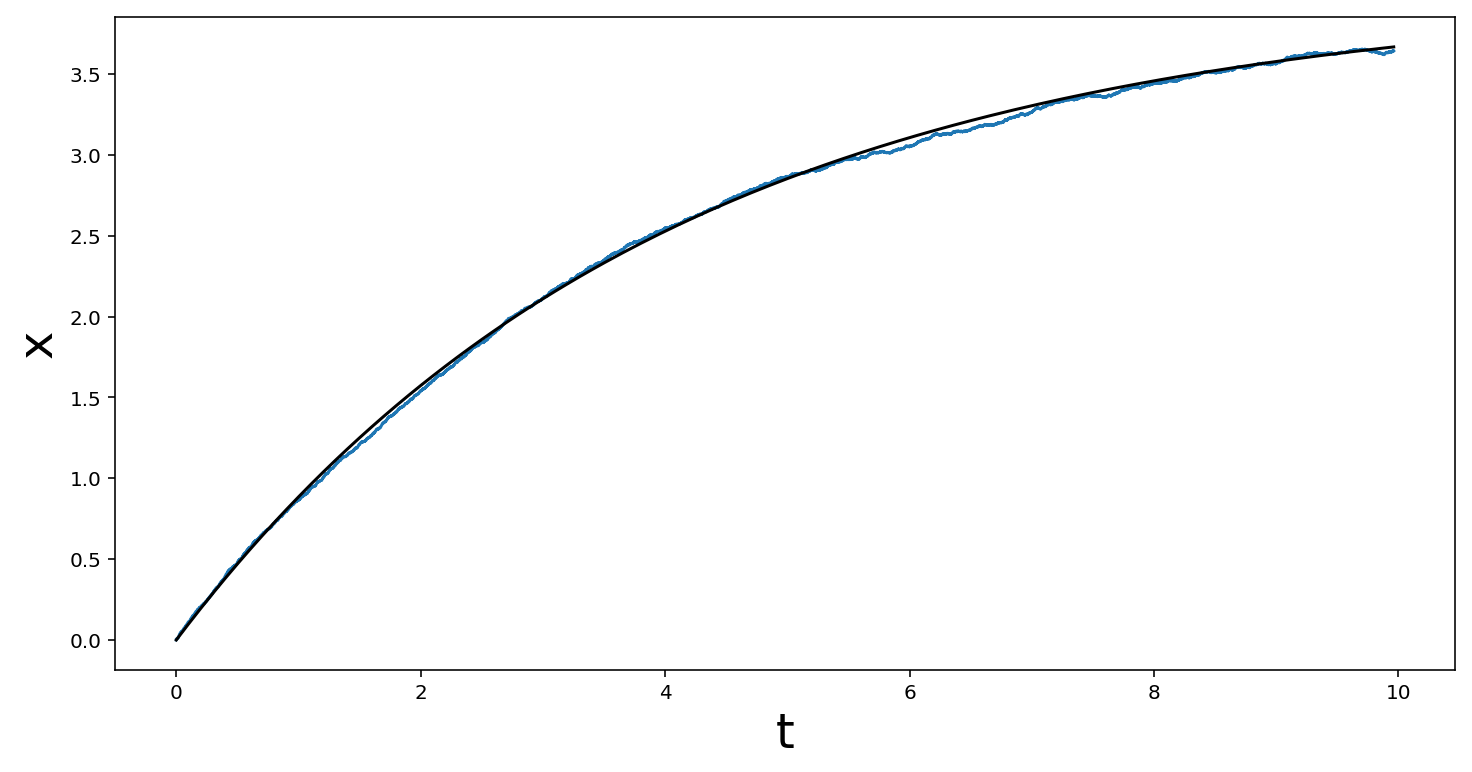

In [10]:
epsilon = 0.001
gamma = 2.
delta = 0.25
alpha = 1.
beta = 1.
n0 = 0
x0 = 0
Nsteps = 10000
N = zeros(Nsteps)
N[0] = n0
X = zeros(Nsteps)
X[0] = x0
T = zeros(Nsteps)
T[0] = 0
for j in arange(1, Nsteps):
    u = rand(1)[0]
    rate = beta/epsilon if N[j-1]==1 else alpha/epsilon
    tau = -log(u)/rate
    T[j] = T[j-1] + tau
    N[j] = 0 if N[j-1]==1 else 1
    ## update x using the exact solution above
    X[j] = X[j-1]*exp(-delta*tau) + gamma*N[j-1]/delta*(1 - exp(-delta*tau)) 

## I want to plot a vector of x values that includes times in between jumps
Tplot = linspace(0, T[9], 200)
dt = Tplot[1] - Tplot[0] ## the time step 'delta t'
Xplot = zeros(200)
Xplot[0] = x0
tnext_jump = T[1] #
n = n0
k = 1
for j in arange(1, 200): ## use the exact solution to the ODE above instead of Euler's method
    if Tplot[j] > tnext_jump:
        n = N[k]
        tnext_jump = T[k+1]
        k += 1   
    Xplot[j] = Xplot[j-1]*exp(-delta*dt) + gamma*n/delta*(1 - exp(-delta*dt))

## I wan't to make a plot for the limiting ODE solution
Tinf = linspace(0, T[-1], 200)
Navg = alpha/(alpha + beta)
Xinf = x0*exp(-delta*Tinf) + gamma*Navg/delta*(1 - exp(-delta*Tinf))


figure(1, [8, 2])
plot(T[:10], N[:10], '-o')
yticks([0, 1])
title('First 10 time steps', fontsize=20)
xlabel('t', fontsize=24)
ylabel('N', fontsize=24);

figure(2, [8, 4])
plot(Tplot, Xplot)
xlabel('t', fontsize=24)
ylabel('x', fontsize=24);


figure(3, [12, 6])
plot(T, X)
plot(Tinf, Xinf, 'k')
xlabel('t', fontsize=24)
ylabel('x', fontsize=24);

# Fully coupled hybrid processes
Suppose that the transition rates depend on $x(t)$. In general, a jump Markov process with time dependent rates uses the jump time density
$$ p(t) = a(t)e^{\int_0^t a(t')dt'} .$$
If the transition rates depend on $x$, they also depend on time. We can represent this computation as
$$
\begin{gather}
\frac{dP}{dt} = a(x(t))e^{-\mu(t)} \\
\frac{d\mu}{dt} = a(x(t)) \\
\dot{x} = f(x, N).
\end{gather}
$$
We can numerically integrate the above system (we might need something better than Euler's method).

  1. Generate uniform RV `u`
  2. Evolve the above system, step by step, until $P(t) > u$


# Gene expression system: mutual repressors model: phase plane
\begin{align*}
    \dot{x} &= f(x, y), \\
    \dot{y} &= f(y, x),
              %% b = 0.15
\end{align*}
where
$$
f(x, y) = \frac{b + x^2}{b + x^2 + y^2} - x.
$$
The parameter $b>0$ represents the base rate of expression.

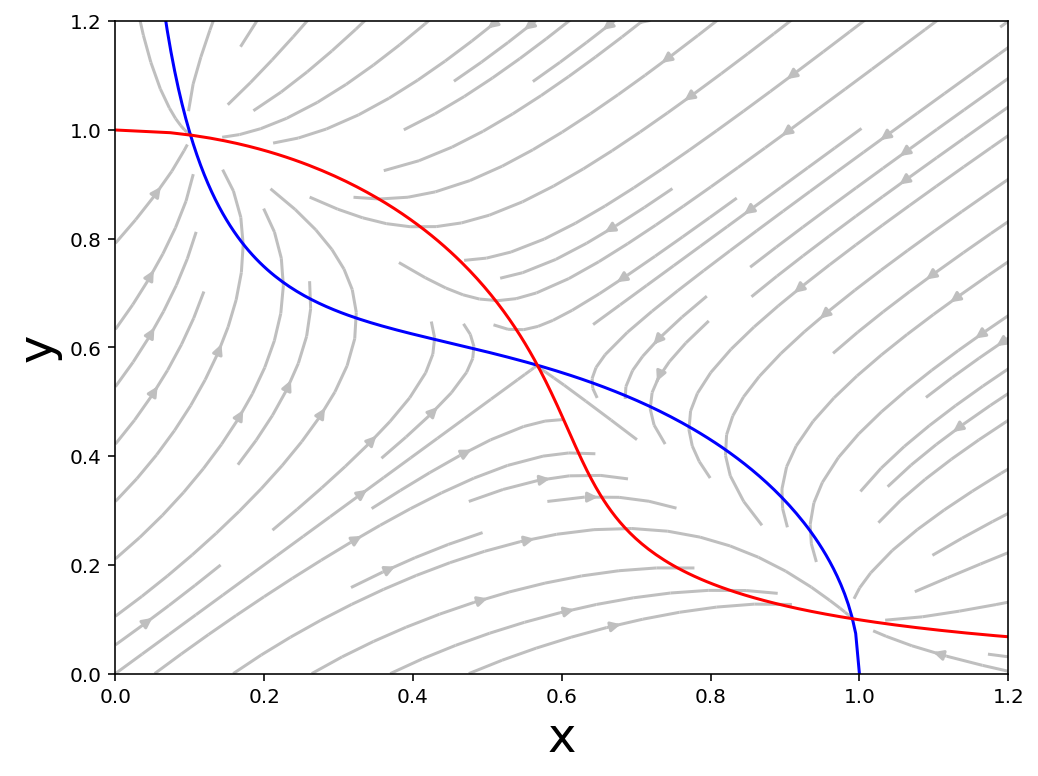

In [5]:
b = 0.1
x = linspace(0.01, 1, 200)
y1 = sqrt((b + x**2)*(1-x)/x)

xv = linspace(0, 1.5, 50)
X, Y = meshgrid(xv, xv)
U = (b + X**2)/(b + X**2 + Y**2) - X
V = (b + Y**2)/(b + Y**2 + X**2) - Y
# U /= sqrt(U**2 + V**2)
# V /= sqrt(U**2 + V**2)

figure(1, [8, 6])

# quiver(X, Y, U, V, color='0.5')
streamplot(X, Y, U, V, color='0.75')

plot(x, y1, 'b')
plot(y1, x, 'r')
xlim(0, 1.2)
ylim(0, 1.2)
xlabel('x', fontsize=24)
ylabel('y', fontsize=24);

# Mutual repressors: hybrid stochastic process
$$
(N=-1)
{{b \atop\longrightarrow}\atop {\longleftarrow \atop x(t)^2}}
(N=0)
{{y(t)^2 \atop\longrightarrow}\atop {\longleftarrow \atop  b}}
(N=1)
$$
where $x$ and $y$ satisfy the ODEs
$$
\begin{align}
\dot{x} &= \mathbf{1}[N(t)\neq 1] - x \\
\dot{y} &= \mathbf{1}[N(t)\neq -1] - y
\end{align}
$$

In [ ]:
### TO BE UPDATED